In [ ]:
import pandas as pd
data = pd.read_csv('/content/IRIS.csv')
print(data.head(10))


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [ ]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
27,5.2,3.5,1.5,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
143,6.8,3.2,5.9,2.3,Iris-virginica
90,5.5,2.6,4.4,1.2,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
61,5.9,3.0,4.2,1.5,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Features and their types:
sepal_length: float64
sepal_width: float64
petal_length: float64
petal_width: float64
species: object


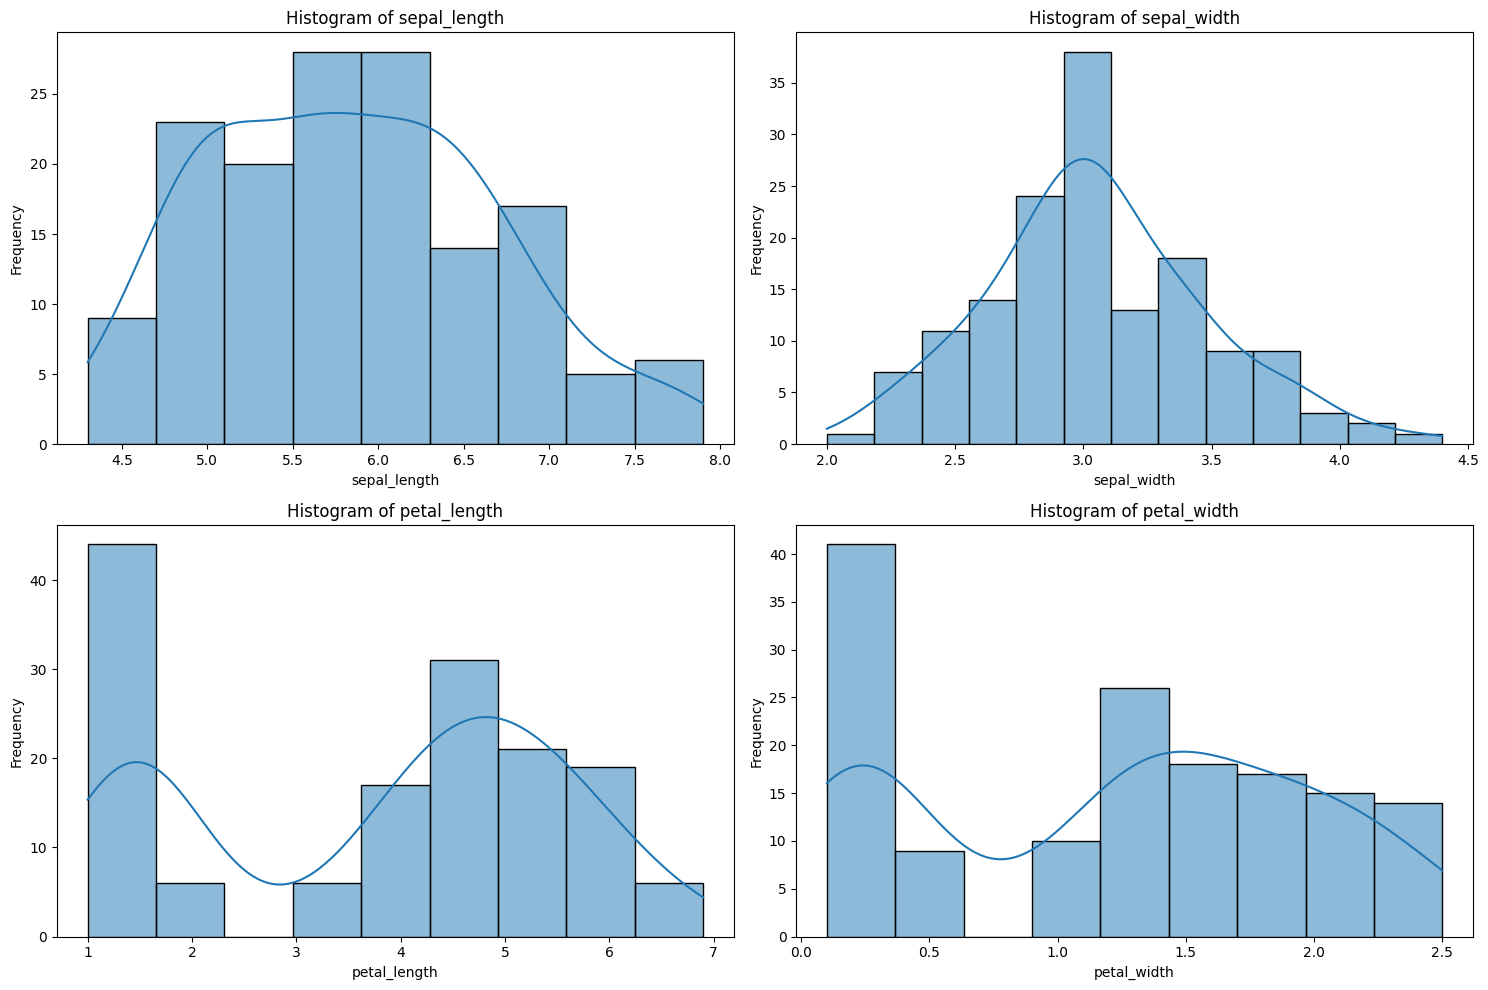

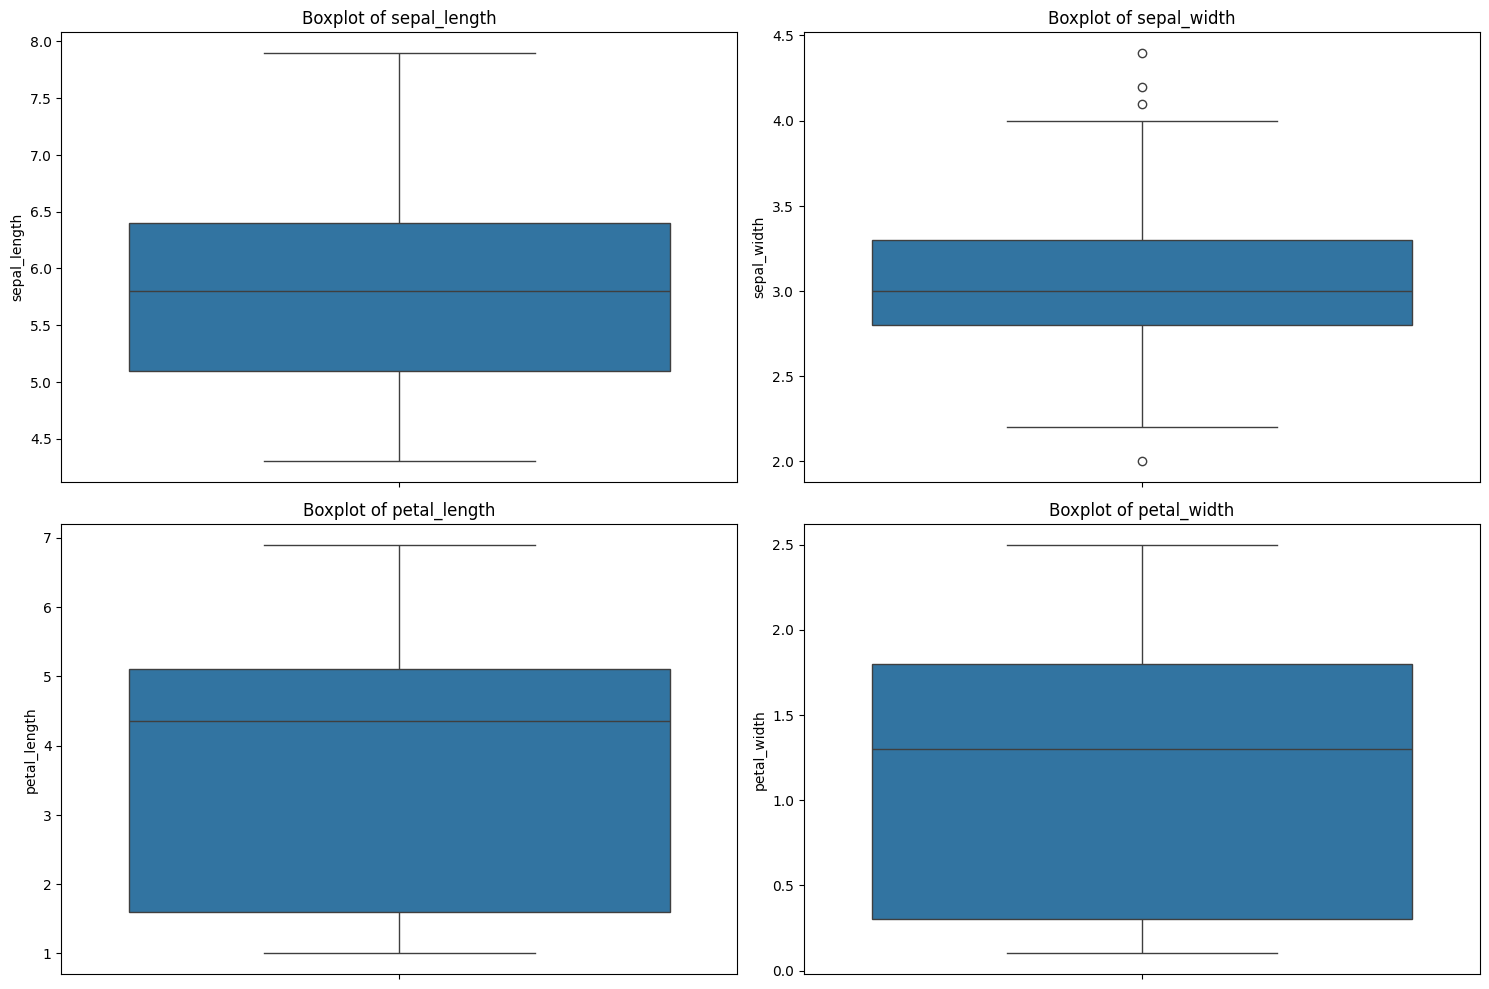


Analysis of Distributions and Outliers:

Feature: sepal_length
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64
No outliers detected using IQR method.

Feature: sepal_width
count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64
Potential outliers:
    sepal_width
15          4.4
32          4.1
33          4.2
60          2.0

Feature: petal_length
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64
No outliers detected using IQR method.

Feature: petal_width
count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%    

In [ ]:
# prompt: 1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
# 2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
# 3. Create a boxplot for each feature in the dataset.
# 4. Compare distributions and identify outliers.

import matplotlib.pyplot as plt
import seaborn as sns

# 1. List features and their types
print("Features and their types:")
for col in data.columns:
    print(f"{col}: {data[col].dtype}")

# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns


# 2. Histograms for numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)  # Adjust the layout as needed
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 3. Boxplots for numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=data[col])  # Use 'y=' for vertical boxplots
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


# 4. Compare distributions and identify outliers (Qualitative)
print("\nAnalysis of Distributions and Outliers:")
for col in numeric_cols:
    print(f"\nFeature: {col}")

    # Basic descriptive statistics
    print(data[col].describe())

    # Outlier identification (using IQR rule)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not outliers.empty:
      print("Potential outliers:")
      print(outliers[[col]])
    else:
      print("No outliers detected using IQR method.")


